# PH3022-Machine Learning and Neural Computation-Assignment_07

# Q1

# Q1.a

A kernel function measures the similarity between two data points in a higher-dimensional space without explicitly converting the data into that space.

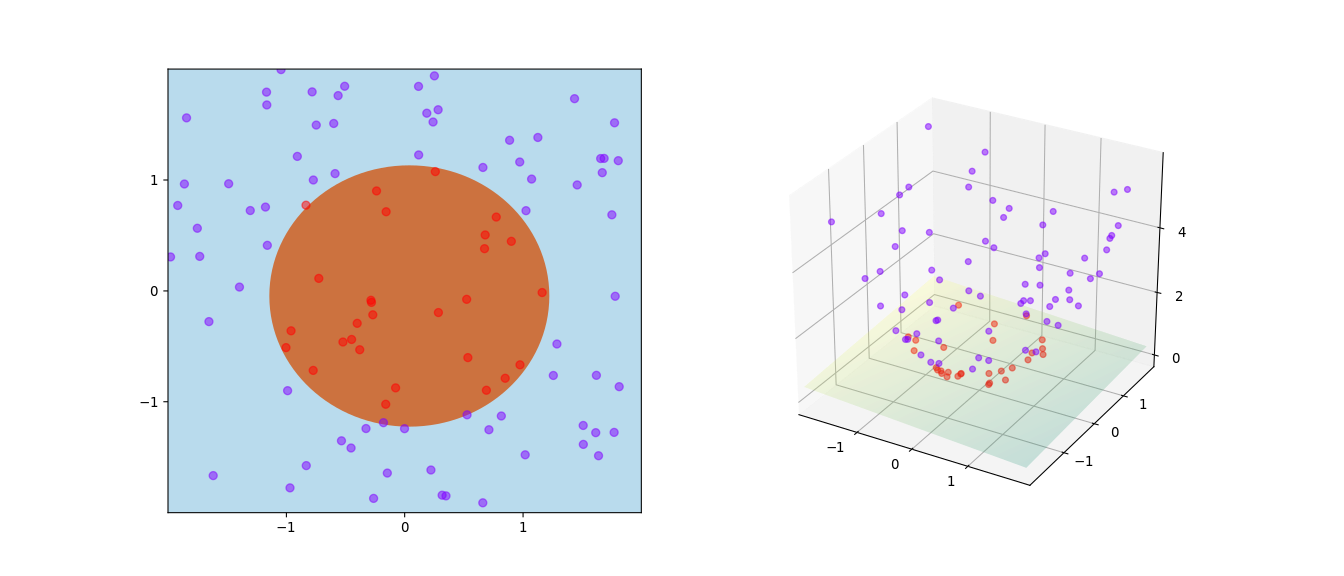

# Q1.b

The kernel trick is a technique that allows algorithms to work in a high-dimensional feature space by computing inner products using a kernel function, avoiding direct and expensive transformations.

# Q1.c

Bias is the error caused by overly simple assumptions in a model. High bias models underfit the data and fail to capture important patterns.

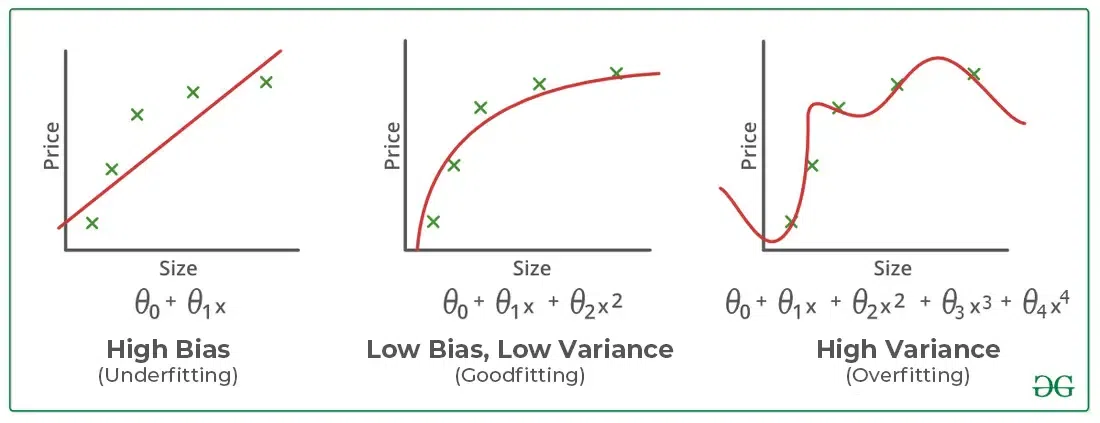

# Q1.d

Variance is the error caused by a model being too sensitive to small changes in the training data. High variance models overfit and perform poorly on unseen data.

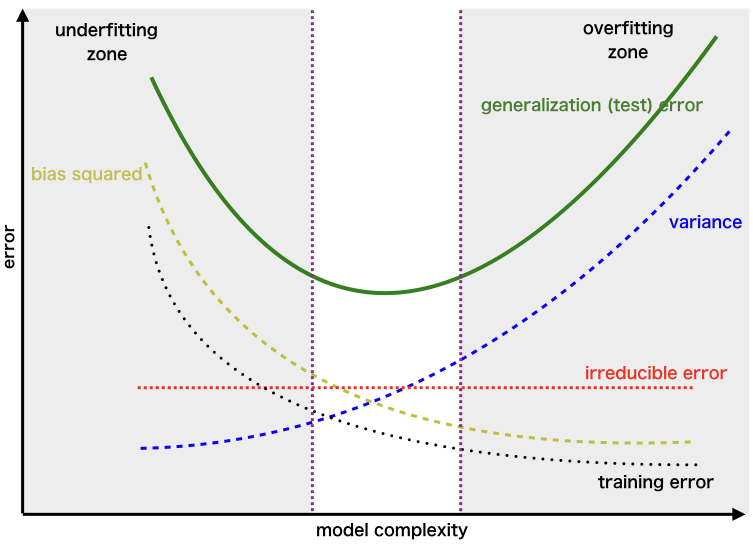

# Q1.e

A decision boundary is a line or surface that separates different classes in a feature space as learned by a classifier.

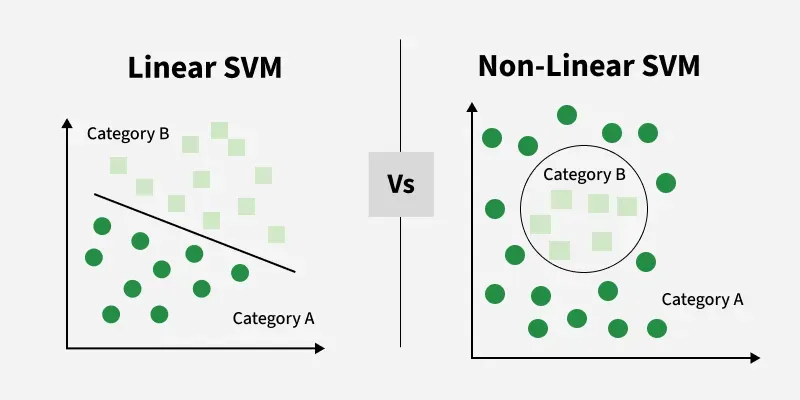

# Q1.f

The optimal hyperplane is the separating plane that maximizes the margin between different classes in Support Vector Machines.

# Q1.g

Margin is the distance between the decision boundary (hyperplane) and the nearest data points from each class. A larger margin leads to better generalization.

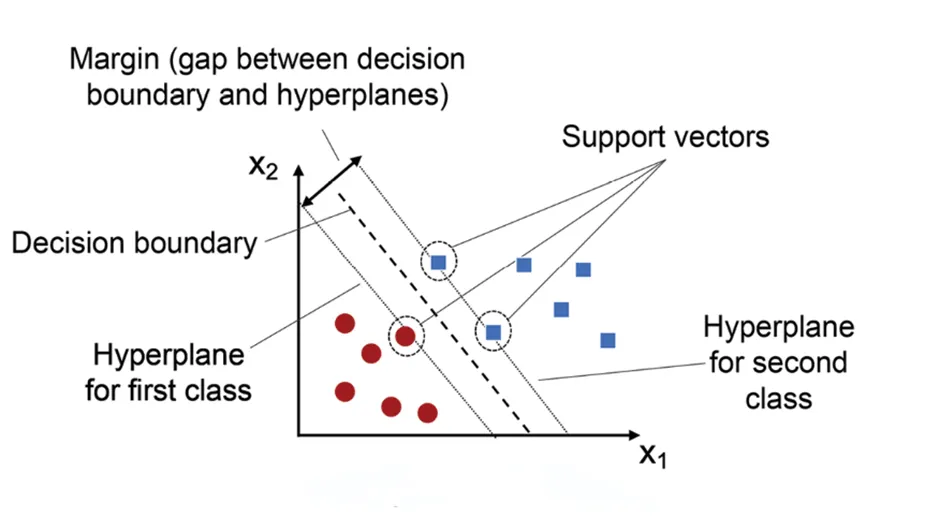

# Q2

# Q2.a

The sigmoid kernel is given by:
$$K(x,y)=\tanh(\alpha\, x^T y + c)$$

# Q2.b

$x,y$: Input feature vectors

$x^Ty$: Dot product of the two vectors

$\alpha\,$: Scaling parameter (controls the slope of the function)

$c$: Constant term (shifts the function)

$tanh$: Hyperbolic tangent activation function

# Q2.c

The range of the sigmoid (tanh) kernel is:
$$−1≤K(x,y)≤1$$

# Q3

# Q3.a

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


# Q3.b

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


# Q3.c

$C$: Controls trade-off between margin size and classification error
- Small $C$ → larger margin, more misclassification
- Large $C$ → smaller margin, less misclassification

Kernel: Defines the type of decision boundary
- linear, polynomial, rbf, sigmoid

Degree: Degree of polynomial kernel (used only with poly kernel)

Gamma: Controls influence of single training points
- High gamma: overfitting
- Low gamma: underfitting

# Q3.d

# Q3.d.i

In [25]:
from sklearn.metrics import confusion_matrix

y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
print(cm)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


# Q3.d.ii

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_best, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Q4

# Q4.a

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q4.b

Yes, data standardization is required for this dataset.

Support Vector Regression (SVR) is sensitive to feature scales because it relies on distance and dot-product calculations. The California Housing dataset contains features with different numeric ranges. Without standardization, features with larger values may dominate the model, leading to poor convergence and unreliable hyperparameter tuning. Standardization ensures equal feature contribution and improves model performance.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Q4.c

In [29]:
from sklearn.svm import SVR

param_distributions = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3] 
}

svr = SVR()
random_search = RandomizedSearchCV(
                            svr, 
                            param_distributions, 
                            n_iter=10, 
                            cv=3, 
                            scoring='neg_mean_squared_error', 
                            verbose=1, 
                            random_state=42, 
                            n_jobs=-1)

random_search.fit(X_train_scaled[:2000], y_train[:2000])

best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 10}


# Q4.d

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.6079
